# Load packages and cleaned data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm


In [4]:
df = pd.read_csv('house_price_data_clean.csv')
df.head()

,latitude,longitude,zipcode,city,lot_area,document_amount,doc_date,House size,Style,year built,tax_2016,tax_2015,school_dis,fireplace,garage,stories,heat,cooling,prop_type,rooms
0,40.719464,-73.447278,11735,Farmingdale,4000.0,399000.0,2018-05-25,1025.0,Unknown,0.0,11497.0,10839.0,59,0,0,0.0,1,0,Unknown,6.0
1,40.650097,-73.663963,11518,East Rockaway,9100.0,260000.0,2018-05-25,1120.0,Old Style,1923.0,10152.0,9934.0,9,0,0,1.0,1,1,Multi family,7.0
2,40.889949,-73.630004,11542,Glen Cove,43560.0,1070000.0,2018-05-25,3050.0,Unknown,0.0,1673.0,1868.0,118,1,1,0.0,1,0,Unknown,9.0
3,40.854633,-73.613077,11542,Glen Cove,8000.0,485000.0,2018-05-25,1265.0,Unknown,0.0,9552.0,8773.0,108,0,1,0.0,1,0,Unknown,8.0
4,40.673428,-73.705100,11580,Valley Stream,5301.0,430000.0,2018-05-25,1464.0,Unknown,0.0,2728.0,2781.0,31,0,1,0.0,1,0,Unknown,8.0


In [5]:
df['city'].value_counts()

Valley Stream         1447
Massapequa            1400
Levittown             1220
Hicksville             983
Merrick                948
                      ... 
Garden City South        2
Cold Spring Harbor       2
Brooklyn                 1
Little Neck              1
Amityville               1
Name: city, Length: 85, dtype: int64

In [6]:
df = df[df['city'] != 'Brooklyn'] # the outlier is not in the Nassau County

## Extract year, month, day from 'doc_date'

In [7]:
df['doc_year'] = pd.DatetimeIndex(df['doc_date']).year

In [8]:
df['doc_month'] = pd.DatetimeIndex(df['doc_date']).month
df['doc_day'] = pd.DatetimeIndex(df['doc_date']).day

In [9]:
df = df.drop('doc_date', axis = 1)

## Bucketize latitude and longitude to categorical variables

In [10]:
df['lat_cat'] = pd.cut(df['latitude'], bins=10, labels=False)

In [11]:
df['long_cat'] = pd.cut(df['longitude'], bins=10, labels=False)

In [12]:
df = df.drop(['latitude', 'longitude'], axis = 1)

## Convert year_built to age of buildings

In [13]:
df['age'] = df['year built'].apply(lambda x: x if x <1 else 2020 - x)

In [14]:
df['age'] = df['age'].replace(0.0, float('NaN'))

In [15]:
df['age'].value_counts()

69.0     1869
70.0     1691
72.0     1661
66.0     1653
67.0     1218
         ... 
215.0       1
180.0       1
126.0       1
170.0       1
270.0       1
Name: age, Length: 158, dtype: int64

In [16]:
df['age'].isna().sum()

1223

In [17]:
df = df.drop('year built', axis = 1)

## Set unknown stories values as missing values

In [18]:
df['stories'] = df['stories'].replace(0.0, float('NaN'))

In [19]:
df['stories'].isna().sum()

1276

## Seperate nummerical and categorical variables

In [20]:
df_cat = df[['lat_cat', 'long_cat', 'zipcode', 'city', 'Style', 'school_dis', 'fireplace', 'garage', 'heat', 'cooling', 'prop_type', 'doc_year', 'doc_month', 'doc_day']]

In [21]:
df_num = df[list(set(df.columns.values) - set(df_cat.columns.values) - set(['document_amount']))]

In [22]:
df_num.columns.values

array(['tax_2015', 'stories', 'lot_area', 'age', 'rooms', 'House size',
       'tax_2016'], dtype=object)

## Correlations of nummerical variables and target variable

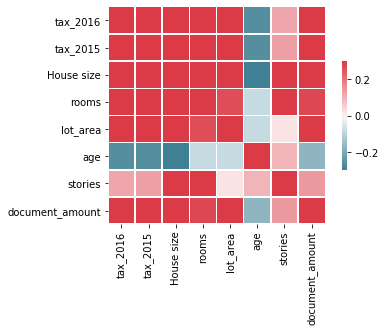

In [23]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['tax_2016', 'tax_2015', 'House size', 'rooms',
       'lot_area', 'age', 'stories', 'document_amount']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Plot histograms of categorical variables

In [24]:
df_cat.columns

Index(['lat_cat', 'long_cat', 'zipcode', 'city', 'Style', 'school_dis',
       'fireplace', 'garage', 'heat', 'cooling', 'prop_type', 'doc_year',
       'doc_month', 'doc_day'],
      dtype='object')

graph for lat_cat: total = 10


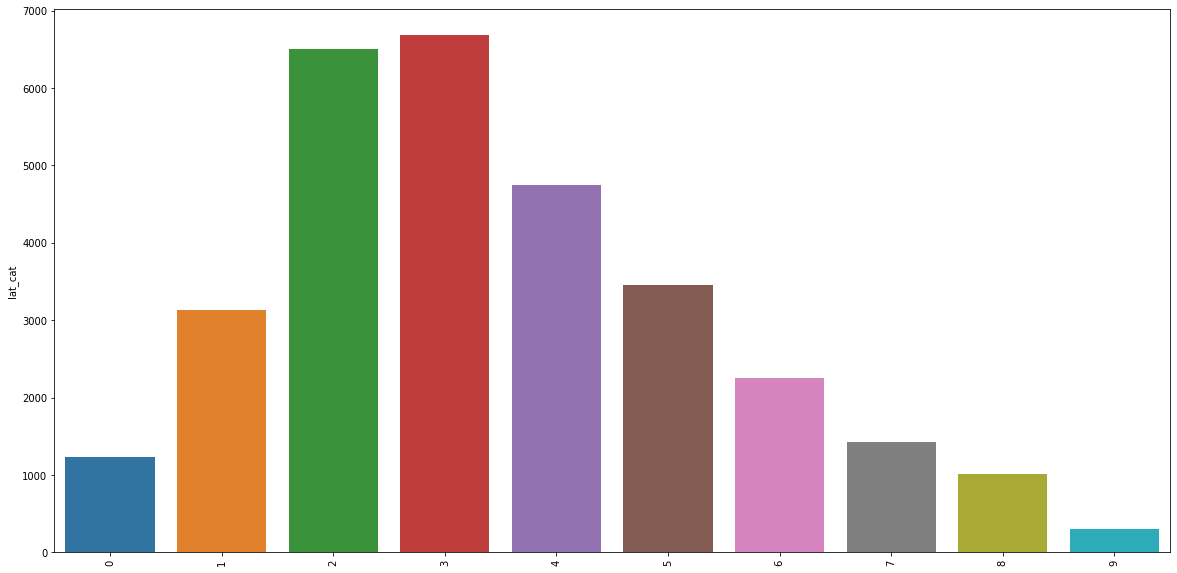

graph for long_cat: total = 10


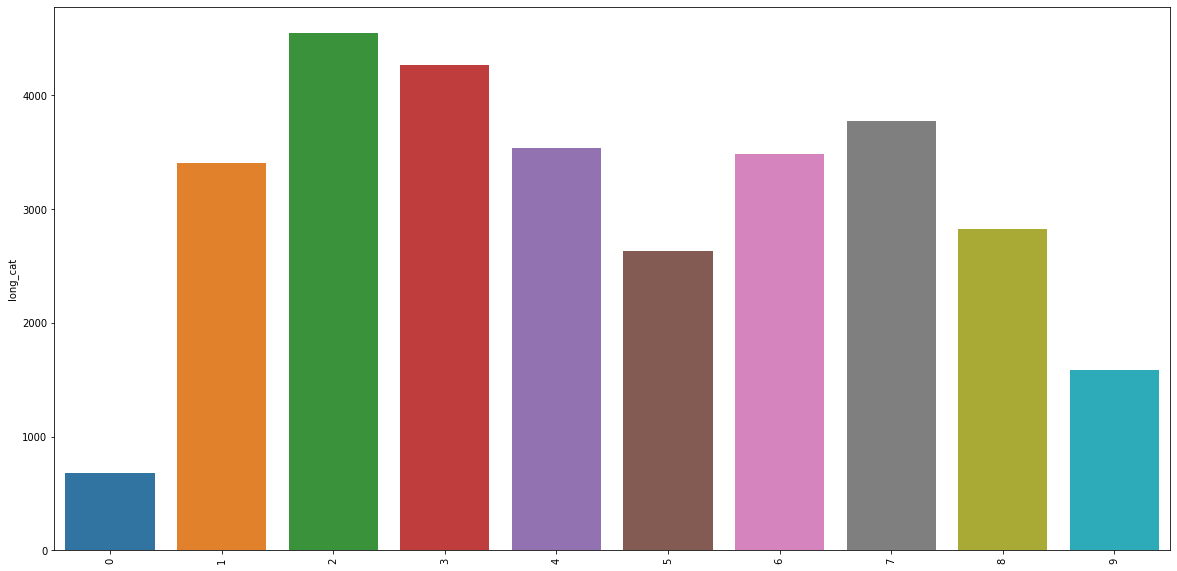

graph for zipcode: total = 70


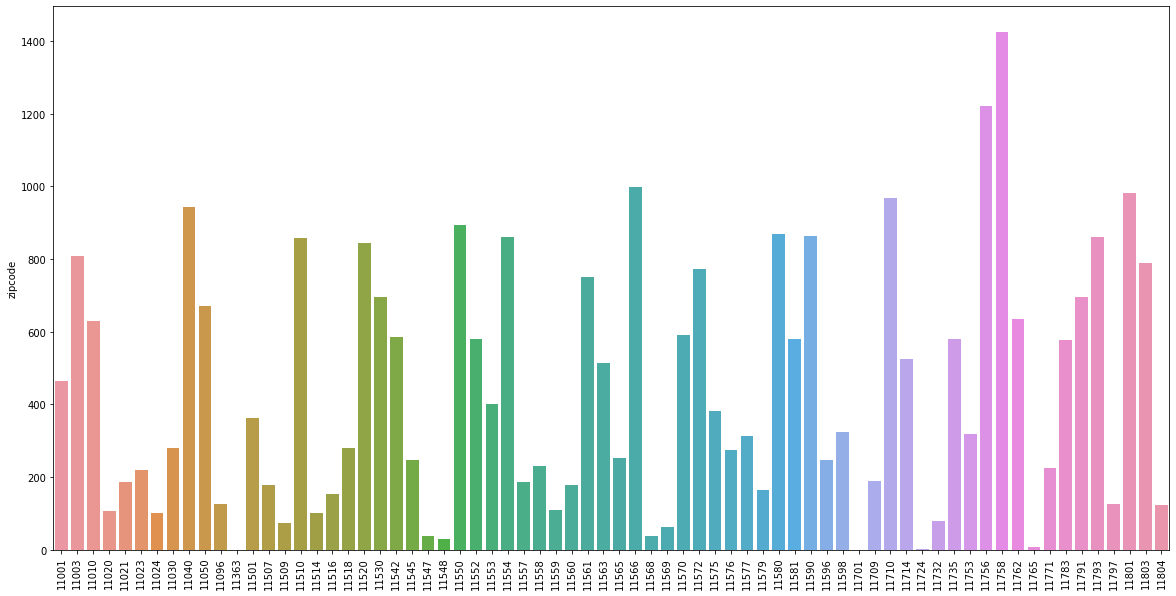

graph for city: total = 84


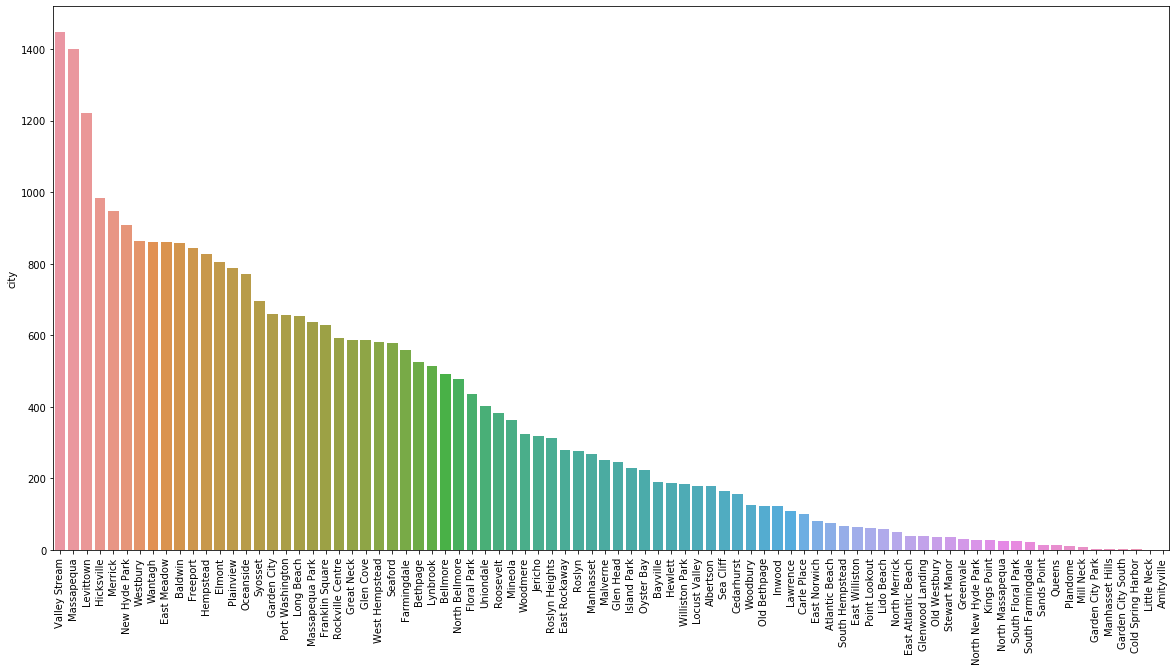

graph for Style: total = 17


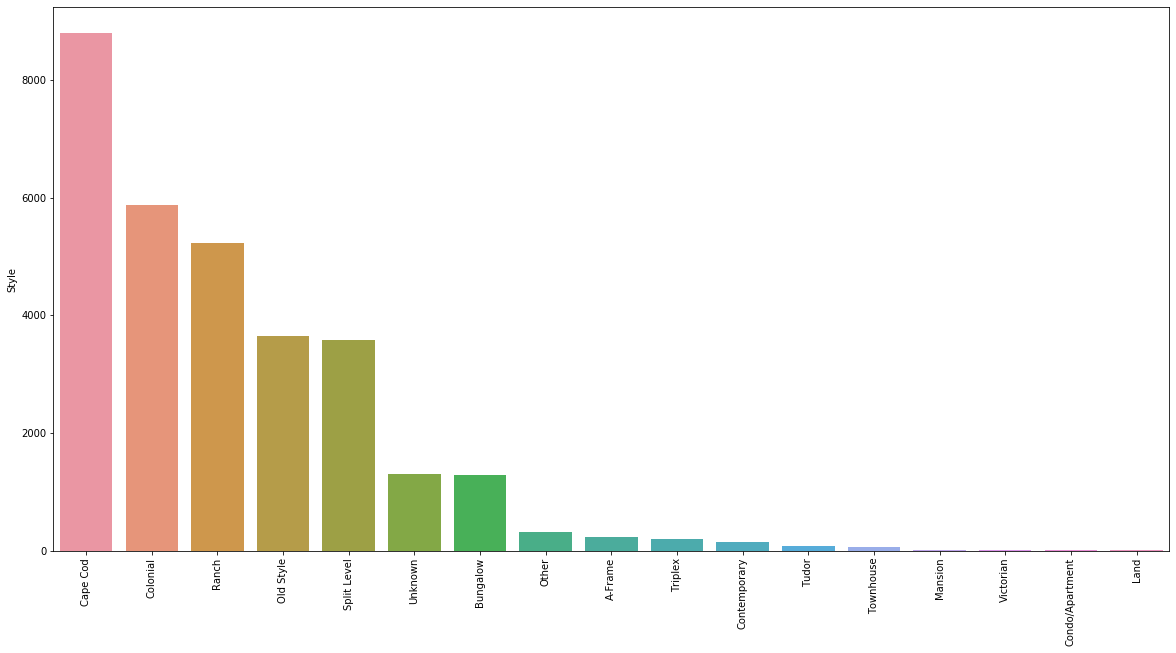

graph for school_dis: total = 57


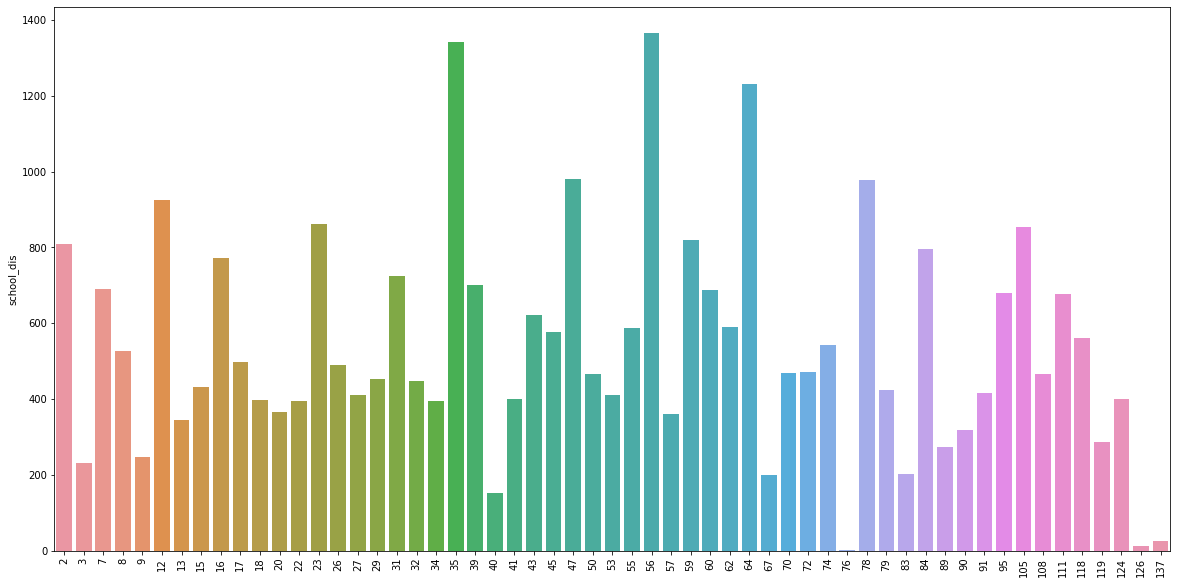

graph for fireplace: total = 2


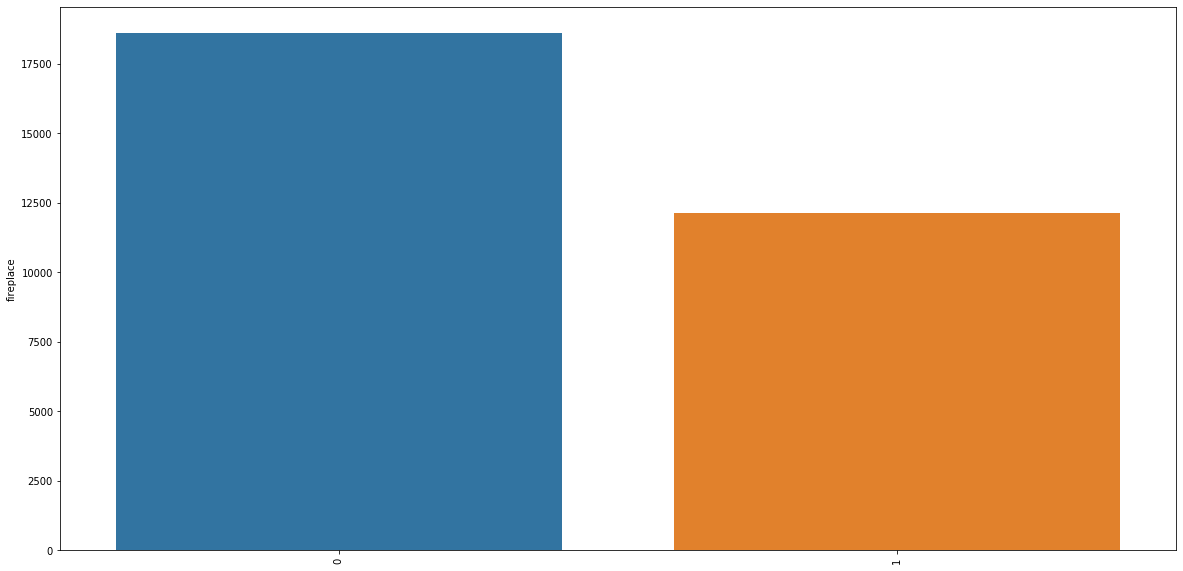

graph for garage: total = 3


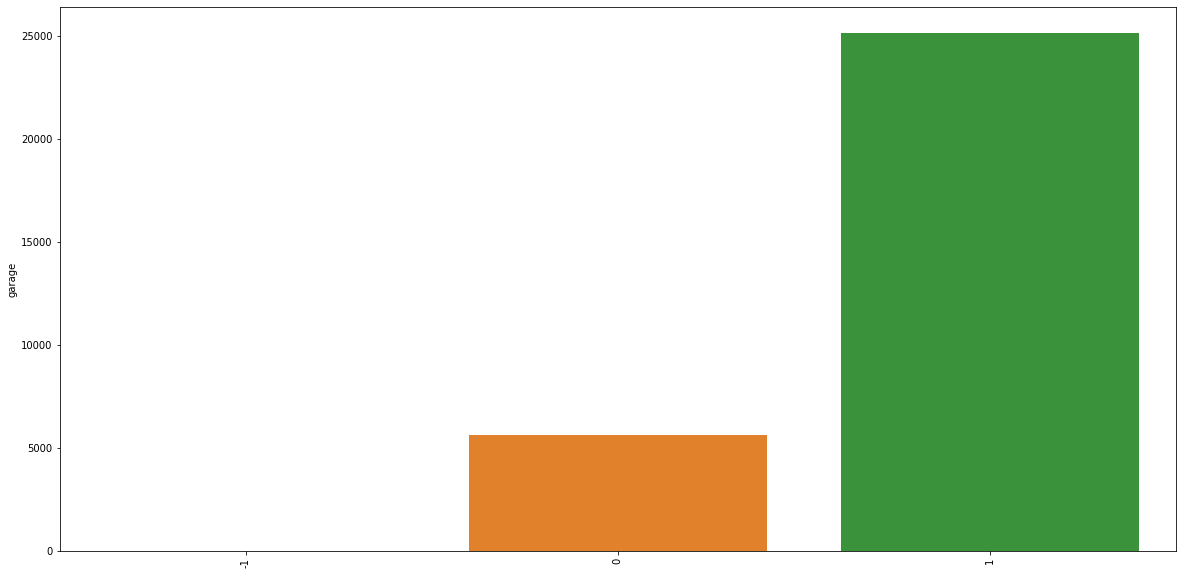

graph for heat: total = 3


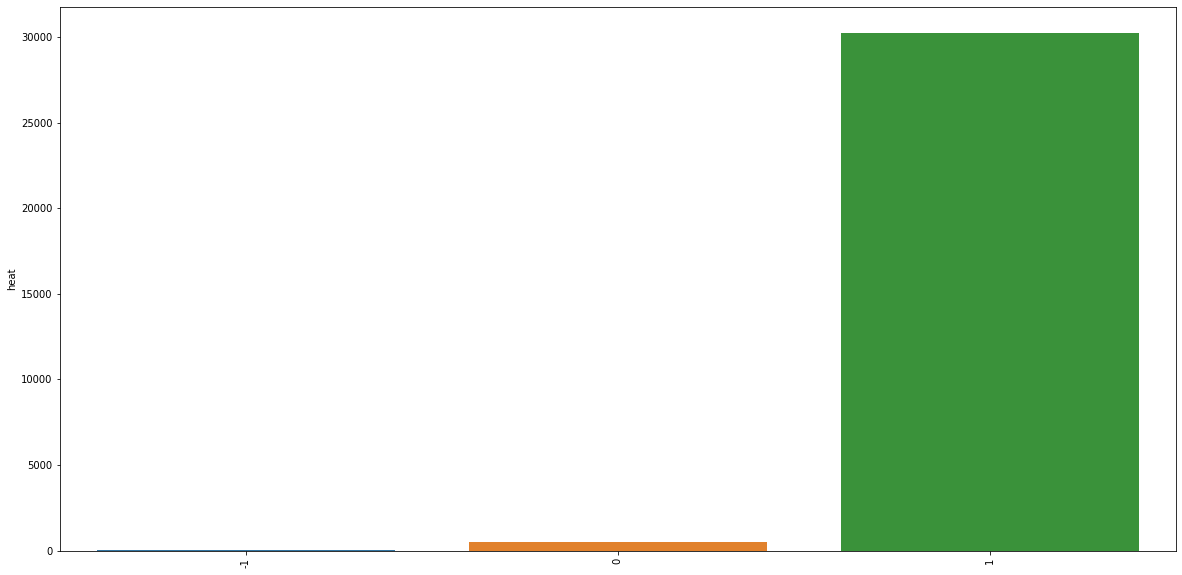

graph for cooling: total = 2


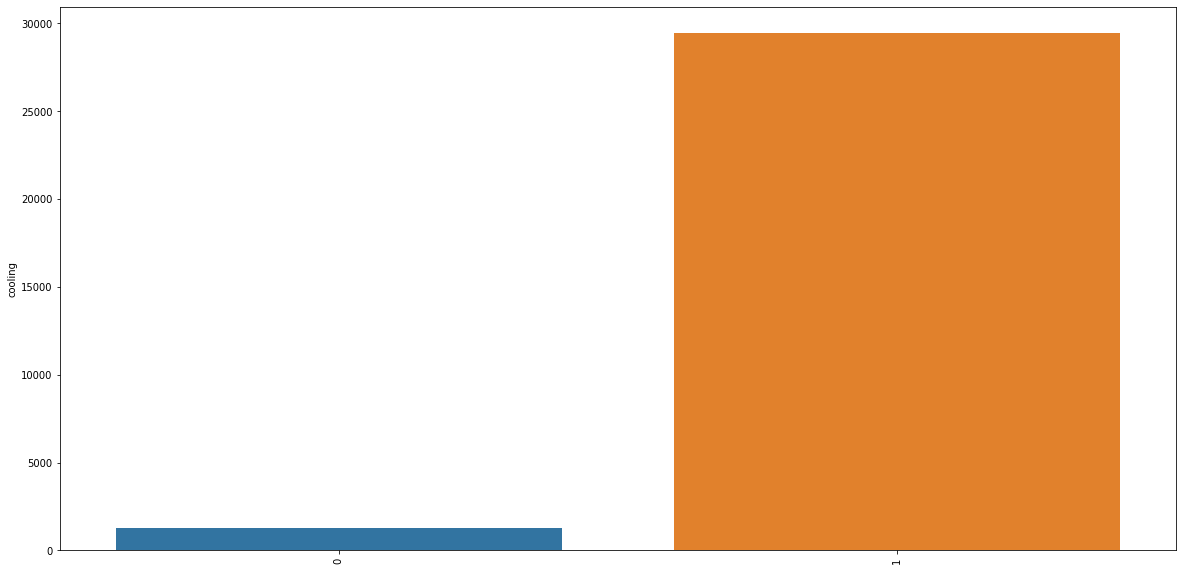

graph for prop_type: total = 7


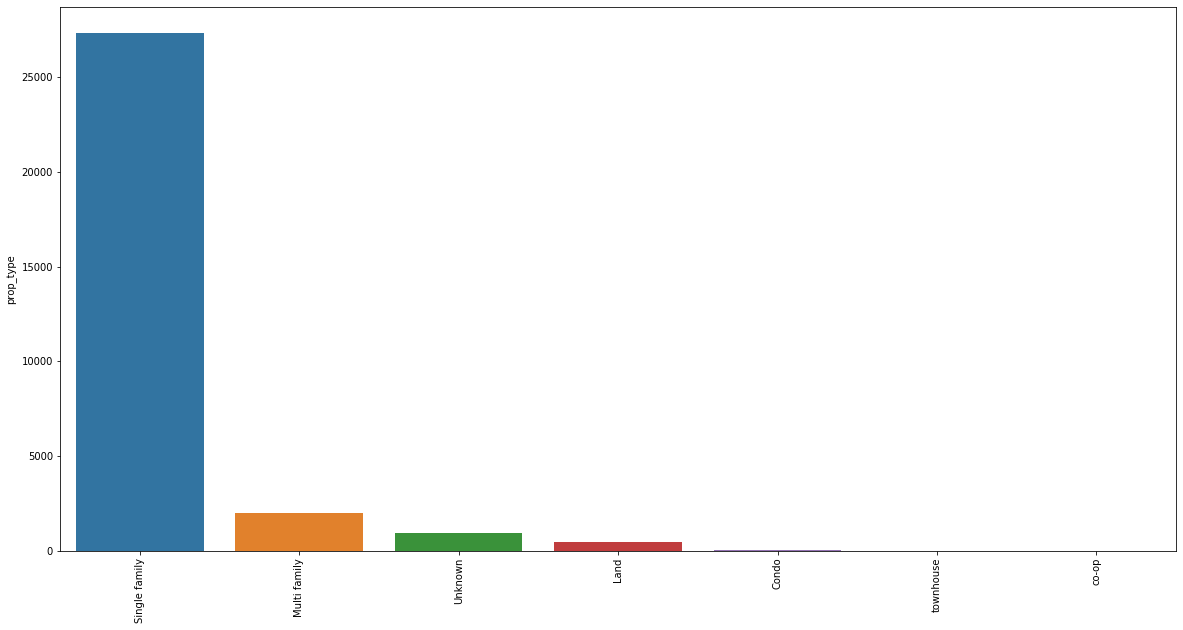

graph for doc_year: total = 11


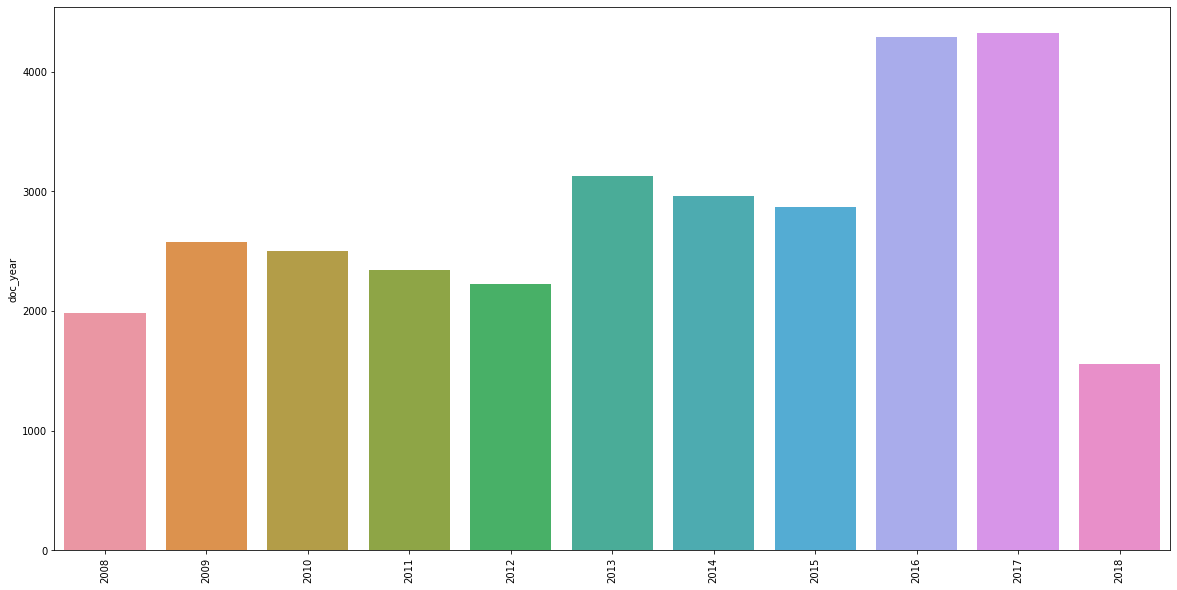

graph for doc_month: total = 12


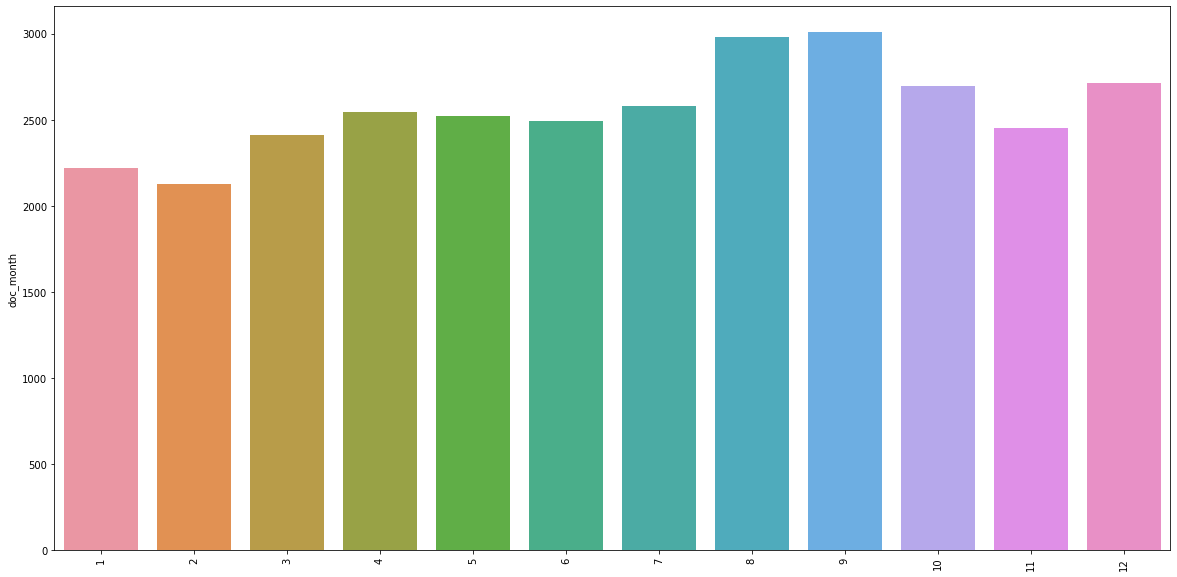

graph for doc_day: total = 31


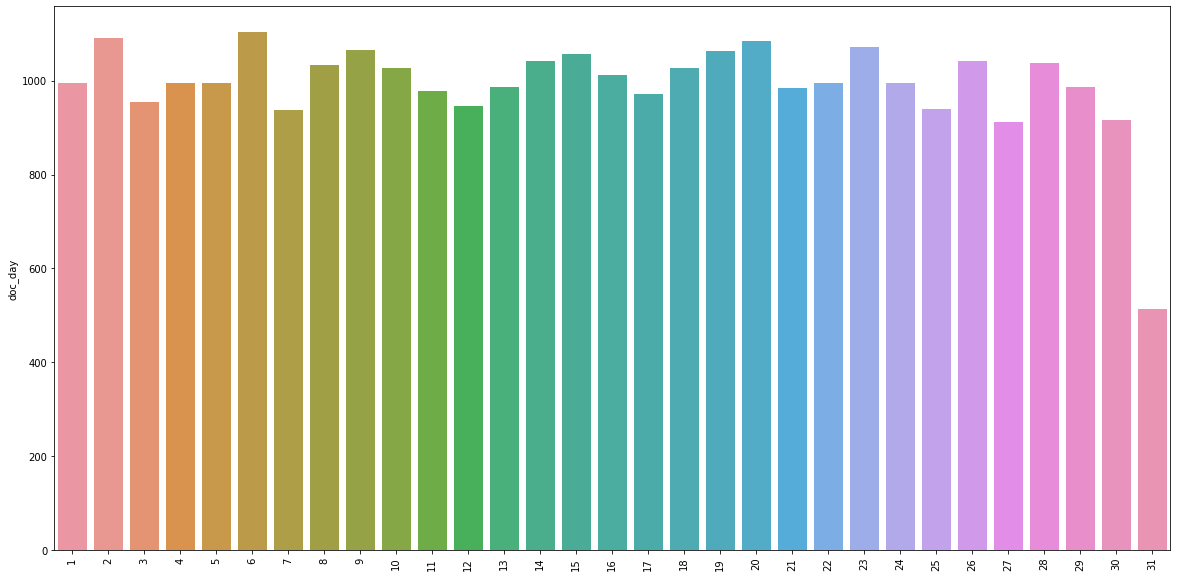

In [229]:
for i in df_cat.columns:
    plt.figure(figsize=(20,10))
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Set categorical variables as string type

In [26]:
df['zipcode'] = df['zipcode'].astype(str)

In [27]:
df['school_dis'] = df['school_dis'].astype(str)
df['fireplace'] = df['fireplace'].astype(str)
df['garage'] = df['garage'].astype(str)
df['heat'] = df['heat'].astype(str)
df['cooling'] = df['cooling'].astype(str)
df['doc_year'] = df['doc_year'].astype(str)
df['doc_month'] = df['doc_month'].astype(str)
df['doc_day'] = df['doc_day'].astype(str)
df['lat_cat'] = df['lat_cat'].astype(str)
df['long_cat'] = df['long_cat'].astype(str)

## Create dummy variables for categorical variables

In [28]:
df_dum = pd.get_dummies(df)

In [29]:
df_dum.columns

Index(['lot_area', 'document_amount', 'House size', 'tax_2016', 'tax_2015',
       'stories', 'rooms', 'age', 'zipcode_11001', 'zipcode_11003',
       ...
       'long_cat_0', 'long_cat_1', 'long_cat_2', 'long_cat_3', 'long_cat_4',
       'long_cat_5', 'long_cat_6', 'long_cat_7', 'long_cat_8', 'long_cat_9'],
      dtype='object', length=327)

In [30]:
y = df.document_amount

mu = 493,479.27 and sigma = 344,834.66


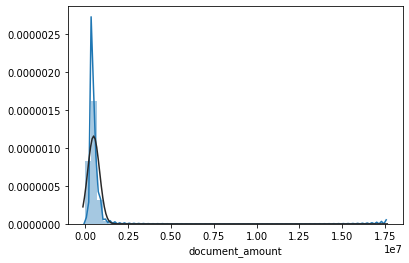

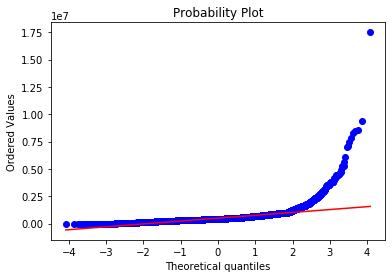

In [31]:
# Distribution Plot:
sns.distplot(df['document_amount'], fit = norm)
(mu, sigma) = norm.fit(df['document_amount'])
print('mu = {:,.2f} and sigma = {:,.2f}'.format(mu, sigma))
# Q-Q plot:
fig = plt.figure()
res = stats.probplot(df['document_amount'], plot=plt)
plt.show()

## Log transform y

transformed mu = 12.95 and transformed sigma = 0.70


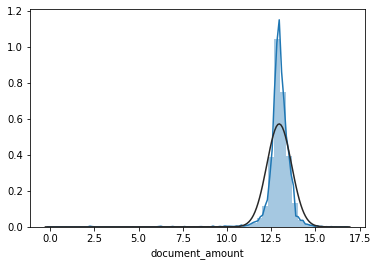

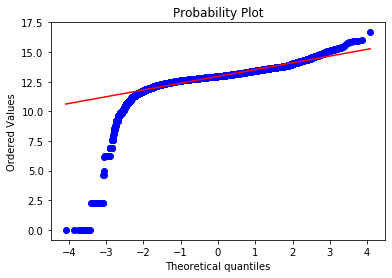

In [32]:
# Apply Log transform to SalePrice
y = np.log(y)
# Distribution Plot
sns.distplot(y, fit = norm)
(mu, sigma) = norm.fit(y)
print('transformed mu = {:,.2f} and transformed sigma = {:,.2f}'.format(mu, sigma))
# QQ Plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

# Data preparation

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost

In [34]:
X = df_dum.drop('document_amount', axis=1)

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

## XGBoost

## Base model (sklearn)

In [225]:
xgb = XGBRegressor(n_estimators=1000, random_state=0)
xgb.fit(train_X, train_y, eval_metric='rmse', eval_set=[(test_X, test_y)], early_stopping_rounds=50)

[19:23:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11.2272
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:10.1083
[2]	validation_0-rmse:9.10175
[3]	validation_0-rmse:8.1963
[4]	validation_0-rmse:7.38171
[5]	validation_0-rmse:6.64874
[6]	validation_0-rmse:5.98985
[7]	validation_0-rmse:5.39751
[8]	validation_0-rmse:4.86491
[9]	validation_0-rmse:4.38631
[10]	validation_0-rmse:3.95647
[11]	validation_0-rmse:3.57059
[12]	validation_0-rmse:3.22413
[13]	validation_0-rmse:2.91326
[14]	validation_0-rmse:2.63463
[15]	validation_0-rmse:2.38493
[16]	validation_0-rmse:2.16185
[17]	validation_0-rmse:1.96257
[18]	validation_0-rmse:1.78489
[19]	validation_0-rmse:1.62661
[20]	validation_0-rmse:1.48606
[21]	validation_0-rmse:1.36159
[22]	validation_0-rmse:1.25175
[23]	validation_0-rmse:1.15482
[24]	validation_0-rmse:1.06981
[25]	validation_0-rmse:0.995786
[26]	validation_0-rmse:

[248]	validation_0-rmse:0.554134
[249]	validation_0-rmse:0.554099
[250]	validation_0-rmse:0.554058
[251]	validation_0-rmse:0.554036
[252]	validation_0-rmse:0.554043
[253]	validation_0-rmse:0.554073
[254]	validation_0-rmse:0.554166
[255]	validation_0-rmse:0.554124
[256]	validation_0-rmse:0.554096
[257]	validation_0-rmse:0.554164
[258]	validation_0-rmse:0.554146
[259]	validation_0-rmse:0.5542
[260]	validation_0-rmse:0.554197
[261]	validation_0-rmse:0.554195
[262]	validation_0-rmse:0.554579
[263]	validation_0-rmse:0.554584
[264]	validation_0-rmse:0.554522
[265]	validation_0-rmse:0.554505
[266]	validation_0-rmse:0.5545
[267]	validation_0-rmse:0.554453
[268]	validation_0-rmse:0.554494
[269]	validation_0-rmse:0.554471
[270]	validation_0-rmse:0.554462
[271]	validation_0-rmse:0.554395
[272]	validation_0-rmse:0.554489
[273]	validation_0-rmse:0.554623
[274]	validation_0-rmse:0.554586
[275]	validation_0-rmse:0.554623
[276]	validation_0-rmse:0.554628
[277]	validation_0-rmse:0.554647
[278]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [226]:
xgb.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>

In [227]:
mean_squared_error(np.exp(xgb.predict(test_X)), np.exp(test_y), squared=False)

199331.7195694336

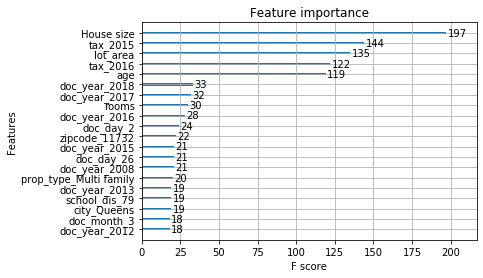

In [228]:
xgboost.plot_importance(xgb, max_num_features=20)
plt.show()

# Tune parameters

In [44]:
from sklearn.model_selection import GridSearchCV

In [110]:
xgb_o = XGBRegressor()
xgb_o.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

## Tune max_depth and min_child_weight

## for max_depth in range(3,7)
## for min_child_weight in range(1,5)

In [111]:
xgb1 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=3)
parameters1 = {
    'max_depth':range(3,7),
    'min_child_weight':range(1,5),
    #'colsample_bytree':[0.8],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    #'subsample':[0.6,0.8,1]  
}
gs1 = GridSearchCV(xgb1, parameters1, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

#fit_params={"early_stopping_rounds":50, 
#            "eval_metric" : "rmse", 
#            "eval_set" : [[train_X, train_y]]}

gs1.fit(train_X,train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 57.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 81.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 103.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 139.2min finished


[17:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:36:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:36:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:36:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:36:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:36:38] INFO: src/tree/updater_prune.cc:74: tree pruning e

[17:36:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:36:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:36:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:36:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:36:52] INFO: src/tree/updater_prune.cc:74: tree prun

[17:37:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:05] INFO: src/tree/updater_prune.cc:74: tree prun

[17:37:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:18] INFO: src/tree/updater_prune.cc:74: tree prun

[17:37:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:32] INFO: src/tree/updater_prune.cc:74: tree prun

[17:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:37:59] INFO: src/tree/updater_prune.cc:74: tree prun

[17:38:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:38:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:38:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:15] INFO: src/tree/updater_prune.cc:74: tree pruni

[17:38:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:38:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:38:29] INFO: src/tree/updater_prune.cc:74: tree prun

[17:38:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:38:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:41] INFO: src/tree/updater_prune.cc:74: tree prun

[17:38:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:38:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:38:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:38:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:38:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:38:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:38:53] INFO: src/tree/updater_prune.cc:74: tree prun

[17:39:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:05] INFO: src/tree/updater_prune.cc:74: tree prun

[17:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:39:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:17] INFO: src/tree/updater_prune.cc:74: tree prun

[17:39:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:29] INFO: src/tree/updater_prune.cc:74: tree prun

[17:39:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:39:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:39:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:39:50] INFO: src/tree/updater_prune.cc:74: tree prun

[17:40:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:40:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:40:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:40:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:40:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:40:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:40:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:40:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:40:06] INFO: src/tree/updater_prune.cc:74: tree prun

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=3),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 7),
                         'min_child_weight': range(1, 5)},
             pre_dispat

In [112]:
gs1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=3)

In [113]:
gs1.best_params_

{'max_depth': 3, 'min_child_weight': 4}

In [114]:
gs1.best_score_

-0.5959956163353038

## for max_depth in range(1,6)
## for min_child_weight in range(2,7)

In [115]:
xgb2 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=2)
parameters2 = {
    'max_depth':range(1,6),
    'min_child_weight':range(2,7),
    #'colsample_bytree':[0.8],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    #'subsample':[0.6,0.8,1]  
}
gs2 = GridSearchCV(xgb2, parameters2, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=5, return_train_score=True)

#fit_params={"early_stopping_rounds":50, 
#            "eval_metric" : "rmse", 
#            "eval_set" : [[train_X, train_y]]}

gs2.fit(train_X,train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 161.4min finished


[21:35:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 

[21:35:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:28] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:35:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:33] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:35:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:39] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:35:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:45] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:35:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:50] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:35:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:35:56] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:36:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:02] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:36:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:09] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:36:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:14] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:36:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:19] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:36:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:25] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:36:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:32] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[21:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:36:37] INFO: src/tree/updater_prune.cc:74: tree pruning end,

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=2),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 6),
                         'min_child_weight': range(2, 7)},
             pre_dispat

In [116]:
gs2.best_params_

{'max_depth': 1, 'min_child_weight': 6}

In [117]:
gs2.best_score_

-0.5851264941652998

## for max_depth in range(1,3)
## for min_child_weight in range(6,10)

In [118]:
xgb3 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters3 = {
    'max_depth':range(1,3),
    'min_child_weight':range(6,10),
    #'colsample_bytree':[0.8],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    #'subsample':[0.6,0.8,1]  
}
gs3 = GridSearchCV(xgb3, parameters3, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=5, return_train_score=True)

#fit_params={"early_stopping_rounds":50, 
#            "eval_metric" : "rmse", 
#            "eval_set" : [[train_X, train_y]]}

gs3.fit(train_X,train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 24.2min finished


[10:08:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 3),
                         'min_child_weight': range(6, 10)},
             pre_dispa

In [119]:
gs3.best_params_

{'max_depth': 1, 'min_child_weight': 9}

In [120]:
gs3.best_score_

-0.5849541707502632

## for max_depth in range(1,4)
## for min_child_weight in range(8,15)

In [121]:
xgb4 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters4 = {
    'max_depth':range(1,4),
    'min_child_weight':range(8,15),
    #'colsample_bytree':[0.8],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    #'subsample':[0.6,0.8,1]  
}
gs4 = GridSearchCV(xgb4, parameters4, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=5, return_train_score=True)

#fit_params={"early_stopping_rounds":50, 
#            "eval_metric" : "rmse", 
#            "eval_set" : [[train_X, train_y]]}

gs4.fit(train_X,train_y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 46.4min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 99.9min finished


[17:53:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 4),
                         'min_child_weight': range(8, 15)},
             pre_dispa

In [122]:
gs4.best_params_

{'max_depth': 2, 'min_child_weight': 14}

In [123]:
gs4.best_score_

-0.5843837036199945

## for max_depth in range(1,4)
## for min_child_weight in range(13,21)

In [124]:
xgb5 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters5 = {
    'max_depth':range(1,4),
    'min_child_weight':range(13,21),
    #'colsample_bytree':[0.8],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    #'subsample':[0.6,0.8,1]  
}
gs5 = GridSearchCV(xgb5, parameters5, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=5, return_train_score=True)

gs5.fit(train_X,train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 126.5min finished


[20:47:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 4),
                         'min_child_weight': range(13, 21)},
             pre_disp

In [125]:
gs5.best_params_

{'max_depth': 2, 'min_child_weight': 18}

In [126]:
gs5.best_score_

-0.5842040120410296

## for max_depth in range(1,5)
## for min_child_weight in range(16,23)

In [127]:
xgb6 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters6 = {
    'max_depth':range(1,5),
    'min_child_weight':range(16,23),
    #'colsample_bytree':[0.8],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    #'subsample':[0.6,0.8,1]  
}
gs6 = GridSearchCV(xgb6, parameters6, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs6.fit(train_X,train_y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 53.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 65.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 80.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 98.6min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 131.7min finished


[23:17:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'min_child_weight': range(16, 23)},
             pre_disp

In [128]:
gs6.best_params_

{'max_depth': 2, 'min_child_weight': 18}

In [129]:
gs6.best_score_

-0.5842040120410296

## {'max_depth': 2, 'min_child_weight': 18}
## RMSE: -0.5842040120410296

## Tunecolsample_bytree and subsample
## for colsample_bytree in [0.6,0.8,1]
## for subsample in [0.6,0.8,1]

In [130]:
xgb7 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters7 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.6,0.8,1],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    'subsample':[0.6,0.8,1]  
}
gs7 = GridSearchCV(xgb7, parameters7, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs7.fit(train_X,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 36.5min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 37.6min finished


[09:33:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1], 'max_depth': [2],
                         'min_child_weight': [18], 'sub

In [131]:
gs7.best_params_

{'colsample_bytree': 0.6,
 'max_depth': 2,
 'min_child_weight': 18,
 'subsample': 0.8}

In [132]:
gs7.best_score_

-0.5840518752552224

## for colsample_bytree in 0.4-1
## for subsample in 0.4-1

In [136]:
xgb8 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters8 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.4,0.5,0.6,0.7,0.8,0.9,1],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    'subsample':[0.4,0.5,0.6,0.7,0.8,0.9,1]  
}
gs8 = GridSearchCV(xgb8, parameters8, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs8.fit(train_X,train_y)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 50.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 80.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 93.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 113.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 1

[14:28:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'max_depth': [2], 'min_child

In [137]:
gs8.best_params_

{'colsample_bytree': 0.5,
 'max_depth': 2,
 'min_child_weight': 18,
 'subsample': 0.9}

In [139]:
gs8.best_score_

-0.5835608650475252

## for colsample_bytree in [0.4,0.45,0.5,0.55,0.6]
## for subsample in [0.8,0.85,0.9,0.95,1]

In [140]:
xgb9 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters9 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.4,0.45,0.5,0.55,0.6],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    'subsample':[0.8,0.85,0.9,0.95,1]  
}
gs9 = GridSearchCV(xgb9, parameters9, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs9.fit(train_X,train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 47.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 68.1min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 83.4min finished


[15:58:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.45, 0.5, 0.55, 0.6],
                         'max_depth': [2], 'min_child_weigh

In [141]:
gs9.best_params_

{'colsample_bytree': 0.5,
 'max_depth': 2,
 'min_child_weight': 18,
 'subsample': 0.95}

In [142]:
gs9.best_score_

-0.5833630461960114

In [143]:
xgb10 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters10 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54],
    #'gamma':[0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    'subsample':[0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]  
}
gs10 = GridSearchCV(xgb10, parameters10, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs10.fit(train_X,train_y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 58.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 65.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 76.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 85.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 96

[20:04:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.46, 0.47, 0.48, 0.49, 0.5, 0.51,
                                              0.52, 0.53, 0

In [144]:
gs10.best_params_

{'colsample_bytree': 0.47,
 'max_depth': 2,
 'min_child_weight': 18,
 'subsample': 0.98}

In [145]:
gs10.best_score_

-0.5829433548104503

## {'colsample_bytree': 0.47,
## 'max_depth': 2,
## 'min_child_weight': 18,
## 'subsample': 0.98}
## RMSE: -0.5829433548104503

# tune gamma (user definable penalty, meant to encourage pruning)

In [150]:
xgb11 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters11 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0,0.01,0.02,0.03],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    #'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    #'reg_lambda':[0,1e-5,1e-2,0.45,1],
    'subsample':[0.98]  
}
gs11 = GridSearchCV(xgb11, parameters11, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs11.fit(train_X,train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  8.0min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.8min finished


[21:16:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47],
                         'gamma': [0, 0.01, 0.02, 0.03], 'max_depth': [2],
     

In [151]:
gs11.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'max_depth': 2,
 'min_child_weight': 18,
 'subsample': 0.98}

In [152]:
gs11.best_score_

-0.5829206287190086

## {'colsample_bytree': 0.47,
## 'gamma': 0.02,
## 'max_depth': 2,
## 'min_child_weight': 18,
## 'subsample': 0.98}
## RMSE: -0.5829206287190086

## tune reg_alpha and reg_lambda

In [153]:
xgb12 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters12 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    'reg_alpha':[0,1e-5, 1e-2,0.5,0.75,1],
    'reg_lambda':[0,1e-5,1e-2,0.45,1],
    'subsample':[0.98]  
}
gs12 = GridSearchCV(xgb12, parameters12, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs12.fit(train_X,train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 51.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 65.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 70.4min finished


[22:39:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'max_depth': [2], 'min_child_weight': [18],
 

In [154]:
gs12.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'max_depth': 2,
 'min_child_weight': 18,
 'reg_alpha': 0.5,
 'reg_lambda': 1,
 'subsample': 0.98}

In [155]:
gs12.best_score_

-0.582779923923772

In [158]:
xgb13 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters13 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    'reg_alpha':[0.5,1,2],
    'reg_lambda':[1,2,3],
    'subsample':[0.98]  
}
gs13 = GridSearchCV(xgb13, parameters13, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs13.fit(train_X,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 24.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 25.4min finished


[10:17:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'max_depth': [2], 'min_child_weight': [18],
 

In [159]:
gs13.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'max_depth': 2,
 'min_child_weight': 18,
 'reg_alpha': 2,
 'reg_lambda': 3,
 'subsample': 0.98}

In [160]:
gs13.best_score_

-0.5825179861501649

In [161]:
xgb14 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters14 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    'reg_alpha':[1,2,3,4],
    'reg_lambda':[2,3,4,5],
    'subsample':[0.98]  
}
gs14 = GridSearchCV(xgb14, parameters14, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs14.fit(train_X,train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 47.4min finished


[11:13:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'max_depth': [2], 'min_child_weight': [18],
 

In [162]:
gs14.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'max_depth': 2,
 'min_child_weight': 18,
 'reg_alpha': 4,
 'reg_lambda': 5,
 'subsample': 0.98}

In [163]:
gs14.best_score_

-0.5821063573739084

In [164]:
xgb15 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters15 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    'reg_alpha':[3,4,5,6],
    'reg_lambda':[4,5,6,7],
    'subsample':[0.98]  
}
gs15 = GridSearchCV(xgb15, parameters15, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs15.fit(train_X,train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 47.4min finished


[12:11:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'max_depth': [2], 'min_child_weight': [18],
 

In [165]:
gs15.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'max_depth': 2,
 'min_child_weight': 18,
 'reg_alpha': 6,
 'reg_lambda': 7,
 'subsample': 0.98}

In [166]:
gs15.best_score_

-0.581808475551984

In [167]:
xgb16 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters16 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    'reg_alpha':range(5,11),
    'reg_lambda':range(6,11),
    'subsample':[0.98]  
}
gs16 = GridSearchCV(xgb16, parameters16, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs16.fit(train_X,train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 48.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 58.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 67.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 79.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 85.6min finished


[13:47:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'max_depth': [2], 'min_child_weight': [18],
 

In [168]:
gs16.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'max_depth': 2,
 'min_child_weight': 18,
 'reg_alpha': 6,
 'reg_lambda': 7,
 'subsample': 0.98}

In [169]:
gs16.best_score_

-0.581808475551984

In [170]:
xgb17 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters17 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    'reg_alpha':[5.5,6,6.5],
    'reg_lambda':[6.5,7,7.5],
    'subsample':[0.98]  
}
gs17 = GridSearchCV(xgb17, parameters17, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs17.fit(train_X,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 22.9min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 23.8min finished


[14:17:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'max_depth': [2], 'min_child_weight': [18],
 

In [171]:
gs17.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'max_depth': 2,
 'min_child_weight': 18,
 'reg_alpha': 5.5,
 'reg_lambda': 7.5,
 'subsample': 0.98}

In [172]:
xgb18 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters18 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    #'learning_rate':[0.1,0.2,0.3,0.35],
    #'n_estimators':range(100,400,100),
    'reg_alpha':[5.25,5.5,5.75],
    'reg_lambda':[7.25,7.5,7.75],
    'subsample':[0.98]  
}
gs18 = GridSearchCV(xgb18, parameters18, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs18.fit(train_X,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 23.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 24.4min finished


[14:52:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'max_depth': [2], 'min_child_weight': [18],
 

In [173]:
gs18.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'max_depth': 2,
 'min_child_weight': 18,
 'reg_alpha': 5.5,
 'reg_lambda': 7.5,
 'subsample': 0.98}

In [176]:
gs18.best_score_

-0.5817427100227821

# tune learning_rate and n_estimators

In [174]:
xgb19 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters19 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    'learning_rate':[0.05,0.1,0.15,0.2,0.3],
    'n_estimators':range(500,1600,100),
    'reg_alpha':[5.5],
    'reg_lambda':[7.5],
    'subsample':[0.98]  
}
gs19 = GridSearchCV(xgb19, parameters19, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs19.fit(train_X,train_y)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 53.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 79

[17:11:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.3],
                         'max_depth': [2], 'min_child_weight': [18],
                         'n_estimators': range(500, 1600, 100),
         

In [175]:
gs19.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 18,
 'n_estimators': 900,
 'reg_alpha': 5.5,
 'reg_lambda': 7.5,
 'subsample': 0.98}

In [177]:
gs19.best_score_

-0.5817070259203855

In [178]:
xgb20 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters20 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    'learning_rate':[0.07,0.08,0.09,0.1,0.11,0.12,0.13],
    'n_estimators':range(800,1050,50),
    'reg_alpha':[5.5],
    'reg_lambda':[7.5],
    'subsample':[0.98]  
}
gs20 = GridSearchCV(xgb20, parameters20, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs20.fit(train_X,train_y)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 49.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 57.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 73.0min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed: 84

[19:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'learning_rate': [0.07, 0.08, 0.09, 0.1, 0.11, 0.12,
                                           0.13],
                         'max_depth': [2], 'min_child_weight': [18],
                

In [180]:
gs20.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 18,
 'n_estimators': 900,
 'reg_alpha': 5.5,
 'reg_lambda': 7.5,
 'subsample': 0.98}

In [183]:
gs20.best_score_

-0.5817070259203855

In [187]:
mean_squared_error(np.exp(gs20.predict(test_X)), np.exp(test_y),squared=False)

196224.87742592252

In [188]:
mean_absolute_error(np.exp(gs20.predict(test_X)), np.exp(test_y))

100531.77826316644

In [216]:
xgb21 = XGBRegressor(n_estimators=1000, random_state=0, verbosity=1)
parameters21 = {
    'max_depth':[2],
    'min_child_weight':[18],
    'colsample_bytree':[0.47],
    'gamma':[0.02],
    'learning_rate':[0.1],
    'n_estimators':range(895,906),
    'reg_alpha':[5.5],
    'reg_lambda':[7.5],
    'subsample':[0.98]  
}
gs21 = GridSearchCV(xgb21, parameters21, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, refit = True, 
                  verbose=10, return_train_score=True)

gs21.fit(train_X,train_y)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 58.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 63.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 71.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 78.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 86

[19:12:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.47], 'gamma': [0.02],
                         'learning_rate': [0.07, 0.08, 0.09, 0.1, 0.11, 0.12,
                                           0.13],
                         'max_depth': [2], 'min_child_weight': [18],
                

In [217]:
gs21.best_params_

{'colsample_bytree': 0.47,
 'gamma': 0.02,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 18,
 'n_estimators': 896,
 'reg_alpha': 5.5,
 'reg_lambda': 7.5,
 'subsample': 0.98}

In [213]:
gs21.best_score_

-0.5816996633384818

In [214]:
mean_absolute_error(np.exp(gs21.predict(test_X)), np.exp(test_y))

100538.87297575992

In [215]:
mean_squared_error(np.exp(gs21.predict(test_X)), np.exp(test_y),squared=False)

196264.51089196434

### Parameters:
'colsample_bytree': 0.47,
 'gamma': 0.02,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 18,
 'n_estimators': 896,
 'reg_alpha': 5.5,
 'reg_lambda': 7.5,
 'subsample': 0.98
### RMSE of test set:  196264.51089196434
### MAE of test set: 100538.87297575992